## Review
### This recitation (09.13) covers two following lectures below:
- **09.06 (Wed)**
- **09:11 (Mon)**

In [ ]:
import math
import doctest
import numpy as np
import matplotlib.pyplot as plt

## Logical Circuit
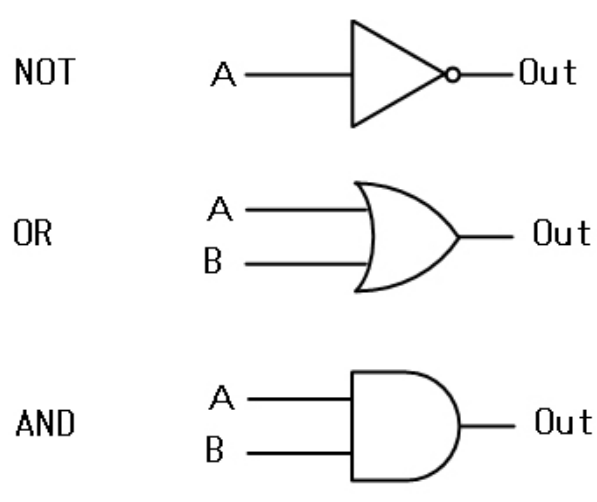



In [ ]:
def AND(x1, x2):
  """
  >>> AND(0, 0)
  0
  >>> AND(0, 1)
  0
  >>> AND(1, 0)
  0
  >>> AND(1, 1)
  1
  """
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.7
  tmp = np.sum(w*x) + b
  if tmp <= 0:
      return 0
  else:
      return 1

def OR(x1, x2):
  """
  >>> OR(0, 0)
  0
  >>> OR(0, 1)
  1
  >>> OR(1, 0)
  1
  >>> OR(1, 1)
  1
  """
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = -0.2
  tmp = np.sum(w*x) + b
  if tmp <= 0:
      return 0
  else:
      return 1

In [ ]:
def NOT(x):
  """
  >>> NOT(0)
  1
  >>> NOT(1)
  0
  """
  # 'ppp' exercise
  # YOUR CODE HERE
  w = -0.5
  b = 0.2
  tmp = w*x + b
  if tmp <= 0:
      return 0
  else:
      return 1

In [ ]:
doctest.run_docstring_examples(NOT, globals(), False, __name__)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/doctest.py", line 1501, in run
    sys.settrace(save_trace)



#### Example
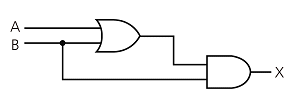

In [ ]:
def ex_circuit(x1, x2):
  """
  >>> ex_circuit(0, 0)
  0
  >>> ex_circuit(0, 1)
  1
  >>> ex_circuit(1, 0)
  0
  >>> ex_circuit(1, 1)
  1
  """
  return AND(OR(x1, x2), x2)

In [ ]:
doctest.run_docstring_examples(ex_circuit, globals(), False, __name__)

#### ppp exercise
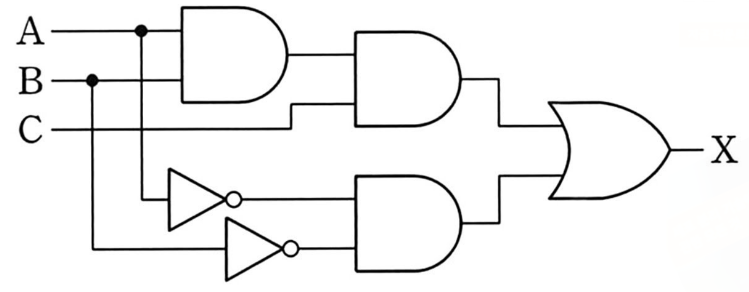

In [ ]:
def circuit(x1, x2, x3):
  """
  >>> circuit(0, 0, 0)
  1
  >>> circuit(0, 0, 1)
  1
  >>> circuit(0, 1, 0)
  0
  >>> circuit(0, 1, 1)
  0
  >>> circuit(1, 0, 0)
  0
  >>> circuit(1, 0, 1)
  0
  >>> circuit(1, 1, 0)
  0
  >>> circuit(1, 1, 1)
  1
  """
  # 'ppp' exercise
  return OR(AND(AND(x1, x2), x3), AND(NOT(x1), NOT(x2)))

In [ ]:
doctest.run_docstring_examples(circuit, globals(), False, __name__)

## Vectorization

### Dot product

In [ ]:
a = np.random.rand(100, 100)
b = np.random.rand(100, 100)

def loop():
  c = np.zeros((100, 100))
  for i in range(100):
    for j in range(100):
      for z in range(100):
        c[i][j] += a[i][z] * b[z][j]
  return c

%time loop()

CPU times: user 991 ms, sys: 5.24 ms, total: 996 ms
Wall time: 1 s


array([[22.54443066, 24.50330423, 27.11995331, ..., 25.18190436,
        24.1799498 , 25.88386447],
       [20.77793001, 25.01438637, 22.4011547 , ..., 24.73655575,
        22.47022234, 23.80650915],
       [21.71127168, 25.71108376, 27.50820437, ..., 24.53790288,
        23.80951186, 26.51038236],
       ...,
       [21.24239382, 24.26034383, 25.75300092, ..., 24.30944287,
        22.48552654, 24.3163219 ],
       [22.34625548, 24.92565053, 25.33044279, ..., 23.28677787,
        24.62299706, 24.45666761],
       [20.29562829, 23.31160399, 24.95144382, ..., 21.92781756,
        22.76615334, 24.51276426]])

In [ ]:
def vectorized():
  return np.dot(a, b)

%time vectorized()

CPU times: user 79 µs, sys: 903 µs, total: 982 µs
Wall time: 4.49 ms


array([[22.54443066, 24.50330423, 27.11995331, ..., 25.18190436,
        24.1799498 , 25.88386447],
       [20.77793001, 25.01438637, 22.4011547 , ..., 24.73655575,
        22.47022234, 23.80650915],
       [21.71127168, 25.71108376, 27.50820437, ..., 24.53790288,
        23.80951186, 26.51038236],
       ...,
       [21.24239382, 24.26034383, 25.75300092, ..., 24.30944287,
        22.48552654, 24.3163219 ],
       [22.34625548, 24.92565053, 25.33044279, ..., 23.28677787,
        24.62299706, 24.45666761],
       [20.29562829, 23.31160399, 24.95144382, ..., 21.92781756,
        22.76615334, 24.51276426]])

### Summation

In [ ]:
a = np.random.rand(100000)
b = np.random.rand(100000)

def loop():
  c = np.zeros(100000)
  for i in range(len(a)):
    c[i] = (a[i] + b[i])
  return c

%time loop()

CPU times: user 44.8 ms, sys: 17 µs, total: 44.8 ms
Wall time: 47.1 ms


array([0.51040658, 0.91116827, 1.27614442, ..., 0.43173591, 0.65313112,
       1.28723962])

In [ ]:
def vectorized():
  return a + b

%time vectorized()

CPU times: user 1.27 ms, sys: 1.04 ms, total: 2.31 ms
Wall time: 2.03 ms


array([0.51040658, 0.91116827, 1.27614442, ..., 0.43173591, 0.65313112,
       1.28723962])

In [ ]:
a = np.random.rand(100000)

def loop():
  b = 0
  for i in range(len(a)):
    b += a[i]
  return b

%time loop()

CPU times: user 35.3 ms, sys: 0 ns, total: 35.3 ms
Wall time: 40.3 ms


50094.55612061962

In [ ]:
def vectorized():
  return np.sum(a)

%time vectorized()

CPU times: user 253 µs, sys: 0 ns, total: 253 µs
Wall time: 271 µs


50094.556120619316

## Activation Functions

### GELU
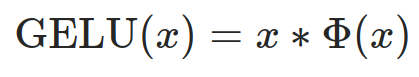
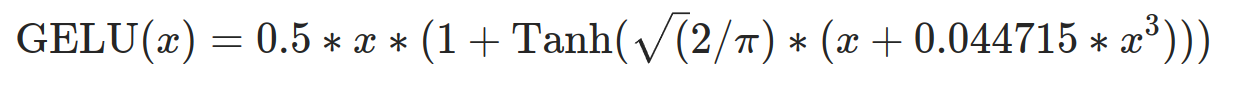
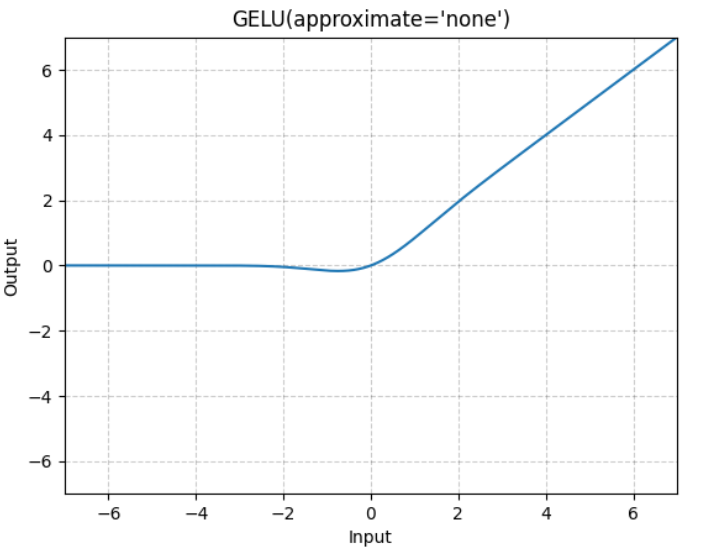

In [ ]:
def gelu(x):
  """
  >>> gelu(np.array([[1, 2], [-2, 0.5]]))
  array([[ 0.84119199,  1.95459769],
         [-0.04540231,  0.34571401]])
  """
  # 'ppp' exercise
  return 0.5 * x * (1 + np.tanh(np.sqrt(2 / np.pi) * (x + 0.044715 * x**3)))

In [ ]:
doctest.run_docstring_examples(gelu, globals(), False, __name__)

## MLP

In [ ]:
##########################
### DATASET
##########################

import sklearn.datasets as dt
data = dt.make_classification(
  n_samples=100,
  n_features=3,
  n_repeated=0,
  n_classes=2,
  n_redundant=0,
  n_clusters_per_class=2)
X, y = data[0], data[1]
y = y.astype(int)

print('Class label counts:', np.bincount(y))
print('X.shape:', X.shape)
print('y.shape:', y.shape)

# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

# Normalize (mean zero, unit variance)
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

Class label counts: [52 48]
X.shape: (100, 3)
y.shape: (100,)


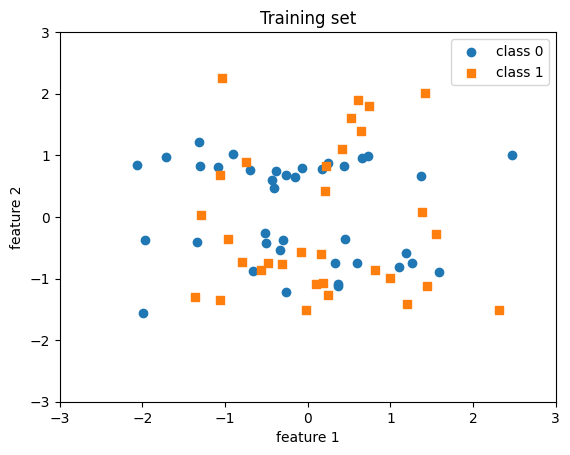

In [ ]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

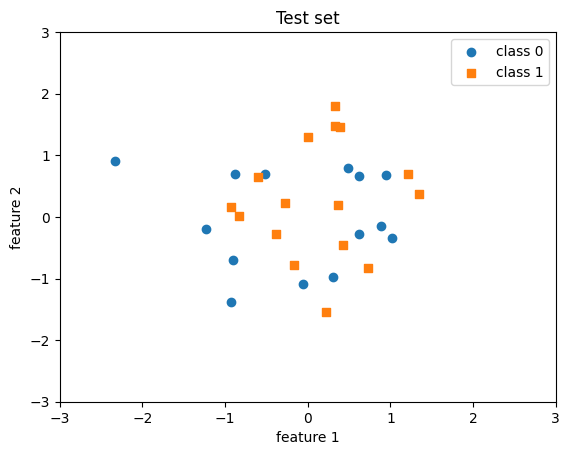

In [ ]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')
plt.title('Test set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend()
plt.show()

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

### Vectorization

In [ ]:
class Perceptron():
  def __init__(self, num_features):
    self.num_features = num_features
    self.weights = np.zeros((num_features, 1), dtype=float)
    self.bias = np.zeros(1, dtype=float)

  def forward(self, x):
    linear = np.dot(x, self.weights) + self.bias
    predictions = np.where(linear > 0., 1, 0)
    return predictions

  def backward(self, x, y):
    predictions = self.forward(x)
    errors = y - predictions
    return errors

  def train(self, x, y, epochs):
    for e in range(epochs):
      for i in range(y.shape[0]):
        errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
        self.weights += (errors * x[i]).reshape(self.num_features, 1)
        self.bias += errors

  def evaluate(self, x, y):
    predictions = self.forward(x).reshape(-1)
    accuracy = np.sum(predictions == y) / y.shape[0]
    return accuracy

In [ ]:
class Perceptron_vec():
  def __init__(self, num_features):
    self.num_features = num_features
    self.weights = np.zeros((num_features, 1), dtype=float)
    self.bias = np.zeros(1, dtype=float)

  def forward(self, x):
    linear = np.dot(x, self.weights) + self.bias
    predictions = np.where(linear > 0., 1, 0)
    return predictions

  def backward(self, x, y):
    predictions = self.forward(x)
    errors = y - predictions
    return errors

  # 'ppp' exercise
  def train(self, x, y, epochs):
    for e in range(epochs):
      errors = self.backward(x.reshape(70, 1, self.num_features), y).reshape(-1)
      self.weights += (np.dot(errors.reshape(-1, 70), x)).sum(axis=0).reshape(self.num_features, 1)
      self.bias += errors.sum(axis=0)

  def evaluate(self, x, y):
    predictions = self.forward(x).reshape(-1)
    accuracy = np.sum(predictions == y) / y.shape[0]
    return accuracy

In [ ]:
ppn = Perceptron(num_features=3)
ppn.train(X_train, y_train, epochs=500)

%time ppn.train(X_train, y_train, epochs=5)

CPU times: user 7.71 ms, sys: 0 ns, total: 7.71 ms
Wall time: 7.76 ms


In [ ]:
ppn = Perceptron_vec(num_features=3)
ppn.train(X_train, y_train, epochs=500)

%time ppn.train(X_train, y_train, epochs=5)

CPU times: user 385 µs, sys: 0 ns, total: 385 µs
Wall time: 390 µs


In [ ]:
train_acc = ppn.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Train set accuracy: 88.57%
Test set accuracy: 96.67%


### 2 layer MLP

In [ ]:
class Perceptron():
  def __init__(self, num_features, node):
    self.num_features = num_features
    self.node = node
    self.weights1 = np.zeros((self.num_features, self.node), dtype=float)
    self.weights2 = np.zeros((self.node, 1), dtype=float)
    self.bias1 = np.zeros(self.node, dtype=float)
    self.bias2 = np.zeros(1, dtype=float)

  def forward(self, x):
    out = np.dot(x, self.weights1) + self.bias1
    hidden_out = sigmoid(out)
    out = np.dot(hidden_out, self.weights2) + self.bias2
    predictions = np.where(out > 0., 1, 0)
    return hidden_out, predictions

  def backward(self, x, y):
    hidden_out, predictions = self.forward(x)
    hidden_err = y - hidden_out
    errors = y - predictions
    return hidden_err, errors

  # 'ppp' exercise
  def train(self, x, y, epochs):
    for e in range(epochs):
      for i in range(y.shape[0]):
        hidden_err, errors = self.backward(x[i].reshape(1, self.num_features), y[i])
        hidden_err = hidden_err.reshape(-1)
        errors = errors.reshape(-1)
        self.weights2 += (errors * hidden_err).reshape(self.node, 1)
        self.bias2 += errors
        self.weights1 += (np.dot(x[i].reshape(3, 1), hidden_err.reshape(1, 5)))
        self.bias1 += hidden_err

  def evaluate(self, x, y):
    _, predictions = self.forward(x)
    predictions = predictions.reshape(-1)
    accuracy = np.sum(predictions == y) / y.shape[0]
    return accuracy

In [ ]:
ppn = Perceptron(num_features=3, node = 5)

ppn.train(X_train, y_train, epochs=50)

print('Model parameters:\n\n')
print('  Weights: %s\n' % ppn.weights1)
print('  Weights: %s\n' % ppn.weights2)
print('  Bias: %s\n' % ppn.bias1)
print('  Bias: %s\n' % ppn.bias2)

Model parameters:


  Weights: [[ 1.39372575  1.39372575  1.39372575  1.39372575  1.39372575]
 [-1.35535887 -1.35535887 -1.35535887 -1.35535887 -1.35535887]
 [ 9.10652633  9.10652633  9.10652633  9.10652633  9.10652633]]

  Weights: [[385.59399963]
 [385.59399963]
 [385.59399963]
 [385.59399963]
 [385.59399963]]

  Bias: [-4.04015684 -4.04015684 -4.04015684 -4.04015684 -4.04015684]

  Bias: [-299.]



In [ ]:
train_acc = ppn.evaluate(X_train, y_train)
print('Train set accuracy: %.2f%%' % (train_acc*100))

Train set accuracy: 90.00%


In [ ]:
test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 100.00%


##Q1. Logical Circuit
Implement without AND and OR Functions.

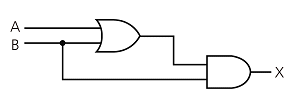

In [ ]:
def circuit(x1, x2):
  """
  >>> ex_circuit(0, 0)
  0
  >>> ex_circuit(0, 1)
  1
  >>> ex_circuit(1, 0)
  0
  >>> ex_circuit(1, 1)
  1
  """
  x = np.array([x1, x2])
  w = np.array([0.5, 0.5])
  b = np.array([-0.2, -0.7])
  tmp = np.sum(w*[np.sum(w*x) + b[0], x2]) + b[1]
  if tmp <= 0:
      return 0
  else:
      return 1

In [ ]:
doctest.run_docstring_examples(circuit, globals(), False, __name__)

## Q2. Vectorization
Vectorize the following function.

In [ ]:
a = np.random.rand(2, 3, 4)
b = np.random.rand(2, 4, 3)

def loop(a,b):

  c = np.zeros((2, 3, 3))
  for i in range(a.shape[0]):
    for j in range(a.shape[1]):
      for k in range(b.shape[2]):
        c[i, j, k] = np.sum(a[i, j, :]*b[i, :, k])

  return c

In [ ]:
def vectorized(a,b):
  """
  >>> vectorized([[[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]], [[1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4]]], [[[1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]], [[1, 2, 3], [1, 2, 3], [1, 2, 3], [1, 2, 3]]])
  array([[[10, 20, 30],
          [10, 20, 30],
          [10, 20, 30]],
  <BLANKLINE>
         [[10, 20, 30],
          [10, 20, 30],
          [10, 20, 30]]])
  """
  return np.matmul(a,b)

In [ ]:
doctest.run_docstring_examples(vectorized, globals(), False, __name__)

##Q3-1. Activation Functions - Leaky ReLU
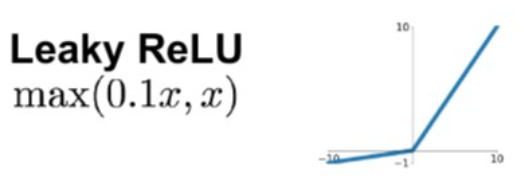

In [ ]:
def Leaky_ReLU(x):
  """
  >>> Leaky_ReLU(0)
  0.0
  >>> Leaky_ReLU(1)
  1.0
  >>> Leaky_ReLU(-1)
  -0.01
  """
  return np.maximum(0.01*x, x)

In [ ]:
doctest.run_docstring_examples(Leaky_ReLU, globals(), False, __name__)

## Q3-2. Activation Functions - ELU
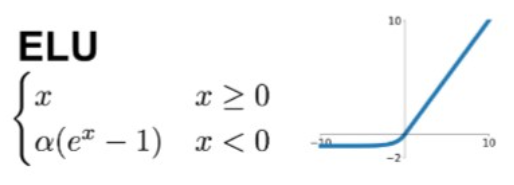

In [ ]:
def ELU(x):
  """
  >>> ELU(0)
  0.0
  >>> ELU(1)
  1.0
  >>> ELU(-1)
  -0.6321205588285577
  """
  alp = 1
  return (x>0)*x + (x<=0)*(alp*(np.exp(x)-1))

In [ ]:
doctest.run_docstring_examples(ELU, globals(), False, __name__)